Objective : Create an Unsupervised machine learning model using KMeans to cluster group of countries.

# II. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set()

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering as SC, AgglomerativeClustering as AC
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from statsmodels.stats.outliers_influence import variance_inflation_factor



import joblib
import json
import warnings
warnings.simplefilter("ignore")

# III. Data Loading

In [2]:
# load data
raw_data = pd.read_csv('h8dsft_P1LC3_Set_2_Samuel_Naiborhu.csv')
pd.set_option('display.max_columns', None)
raw_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
raw_data.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


# IV. Exploratory Data Analysis (EDA)

In [127]:
# see the dataset statistics
raw_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [129]:
raw_data['income'].median()

9960.0

the median income of global population is $9960 per year

In [134]:
raw_data[raw_data['income'] == raw_data['income'].max()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300


Qatar has population with the highest income in the world

In [160]:
raw_data[raw_data['income'] == raw_data['income'].min()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.8,57.5,6.54,334


congo has population with the lowest income in the world

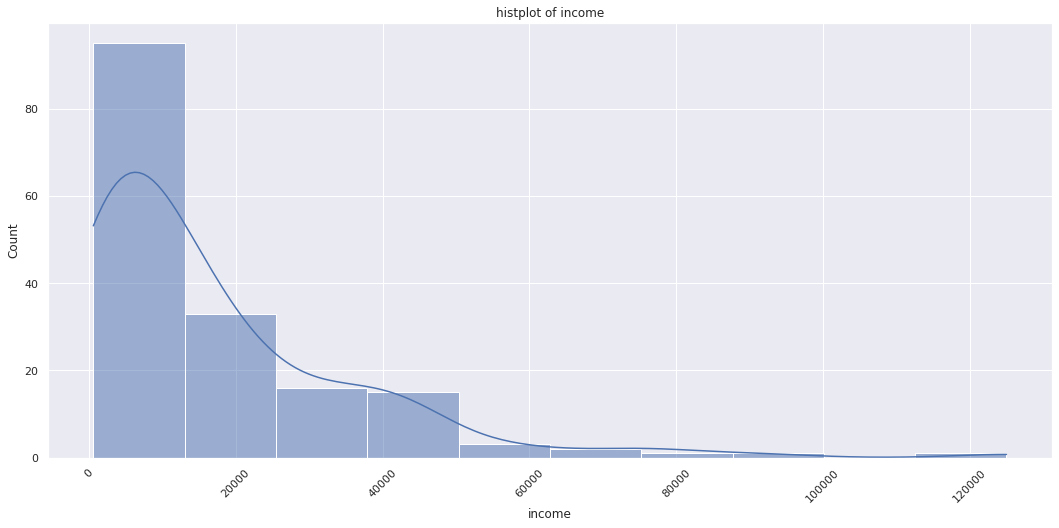

In [141]:
# Create plots

plt.figure(figsize=(18, 8))

# plt.subplot(1,2,1)
sns.histplot(x=raw_data['income'],kde=True, bins=10)
plt.xticks(rotation=45)
plt.title('histplot of income')

plt.show()


there are still a large gap between rich countries and poor countries

In [135]:
raw_data[raw_data['life_expec'] == raw_data['life_expec'].max()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
77,Japan,3.2,15.0,9.49,13.6,35800,-1.9,82.8,1.39,44500


Japan has population with the highest life expectancy in the world

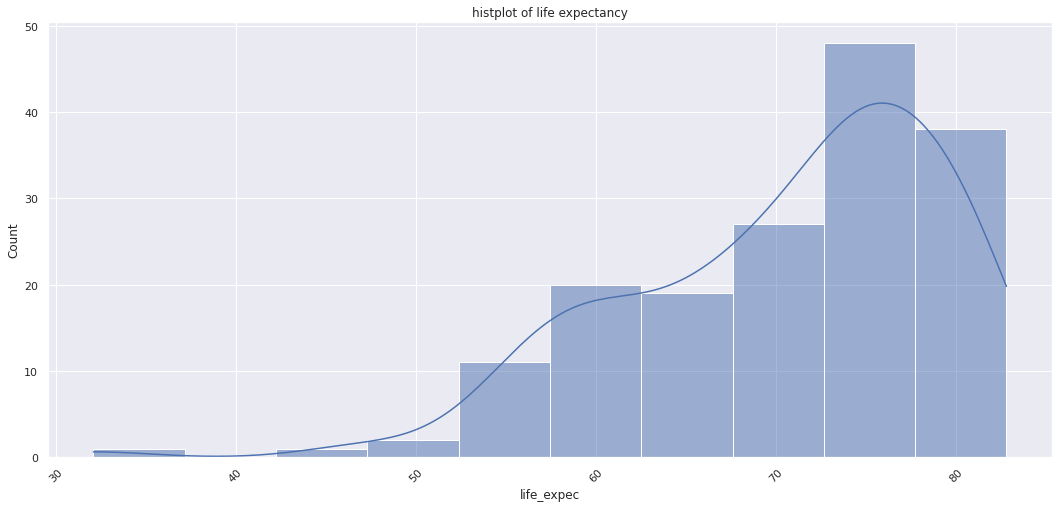

In [140]:
# Create plots

plt.figure(figsize=(18, 8))

# plt.subplot(1,2,1)
sns.histplot(x=raw_data['life_expec'],kde=True, bins=10)
plt.xticks(rotation=45)
plt.title('histplot of life expectancy')

plt.show()


# V. Data preprocessing

## V.I. define dataframe for inferencing

In [4]:
# view dataset size
raw_data.shape[0]

167

In [5]:
# define inference data counts
inf_count =  round(raw_data.shape[0]*0.05)
inf_count

8

In [6]:
# Get Data for model inference
data_inf = raw_data.sample(inf_count, random_state=33)
data_inf.sample(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
93,Madagascar,62.2,25.0,3.77,43.0,1390,8.79,60.8,4.60,413
65,Guyana,37.6,51.4,5.38,79.1,5840,5.73,65.5,2.65,3040
27,Cambodia,44.4,54.1,5.68,59.5,2520,3.12,66.1,2.88,786
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
29,Canada,5.6,29.1,11.30,31.0,40700,2.87,81.3,1.63,47400


In [7]:
# drop data_inf from main dataframe
raw_data_1 = raw_data.drop(data_inf.index)
print(f'old data size: {raw_data.shape[0]}')
print(f'new data size: {raw_data_1.shape[0]}')

old data size: 167
new data size: 159


## V.II Handling Empty Values

In [91]:
# Duplicate dataset to new one ,if something breaks we can start from here instead from the beginning
raw_data_2 = raw_data_1.copy()

In [9]:
# sum null value
raw_data_2.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Since there are no empty values, we can skip this step

## V.III  Handling Outlier

In [10]:
# Plot outlier for target

def outlier_plot(features):
    # Define figure size
    plt.figure(figsize=(16, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(features, bins=30, kde=True)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=features)
    plt.title('Boxplot')

    plt.show()

In [11]:
# make boundary function
def iqr_calc(feature):
    skew_value = feature.skew()
    if -0.5 > skew_value < 0.5:
        upper_boundary = feature.mean() + 3 * feature.std()
        lower_boundary = feature.mean() - 3 * feature.std()
    else:
        IQR= feature.quantile(0.75) - feature.quantile(0.25)
        lower_boundary= feature.quantile(0.25)-(IQR*1.5)
        upper_boundary= feature.quantile(0.75)+(IQR*1.5)
    return lower_boundary, upper_boundary

In [12]:
# make capping function
def capping_data(dataset, column):
  lower_bound, upper_bound = iqr_calc(dataset[column])
  dataset.loc[dataset[column] > upper_bound, column] = upper_bound
  dataset.loc[dataset[column] < lower_bound, column] = lower_bound
  return dataset

In [14]:
# Get Numerical Columns and Categorical Columns

num_columns = raw_data_2.select_dtypes(include=np.number).columns.tolist()
cat_columns = raw_data_2.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
Categorical Columns :  ['country']


Since country name doesnt affect the model at all, we can safely drop the feature

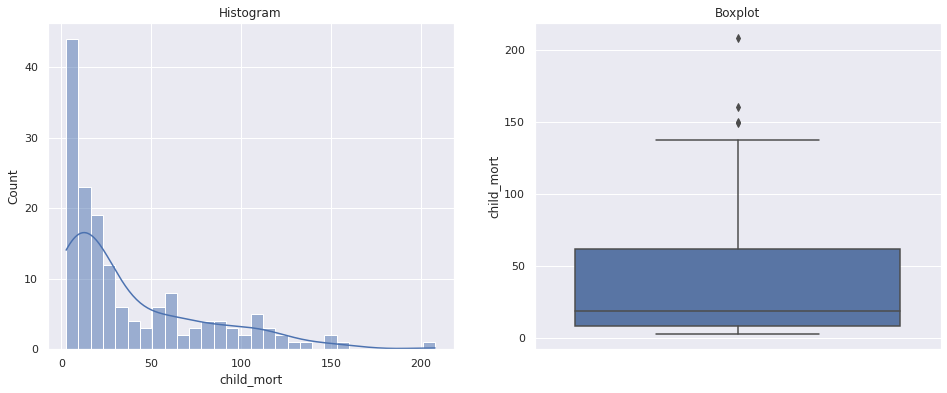

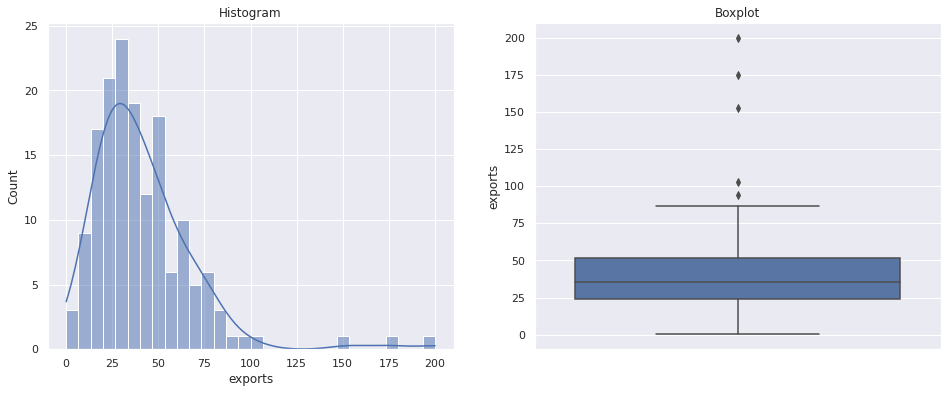

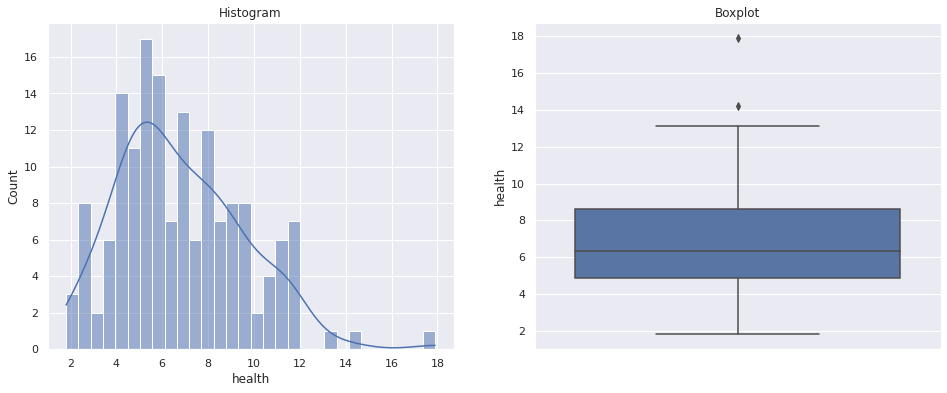

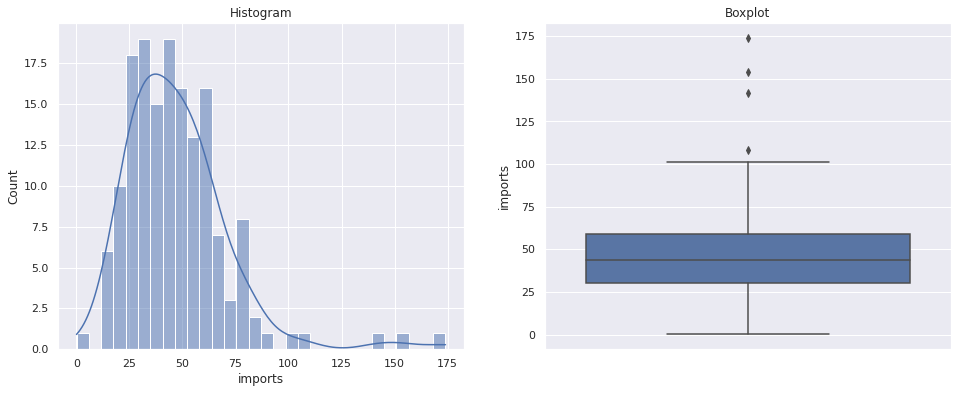

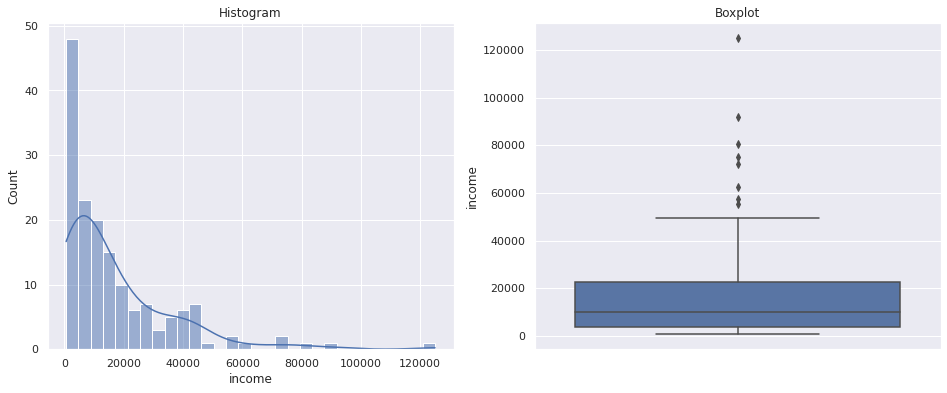

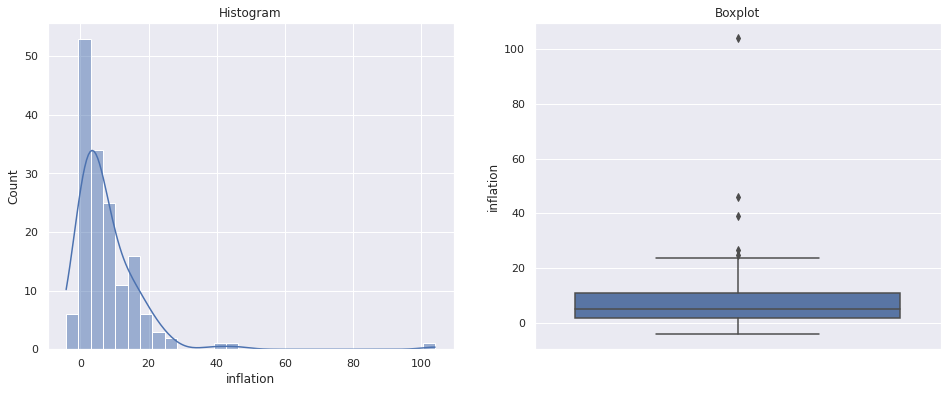

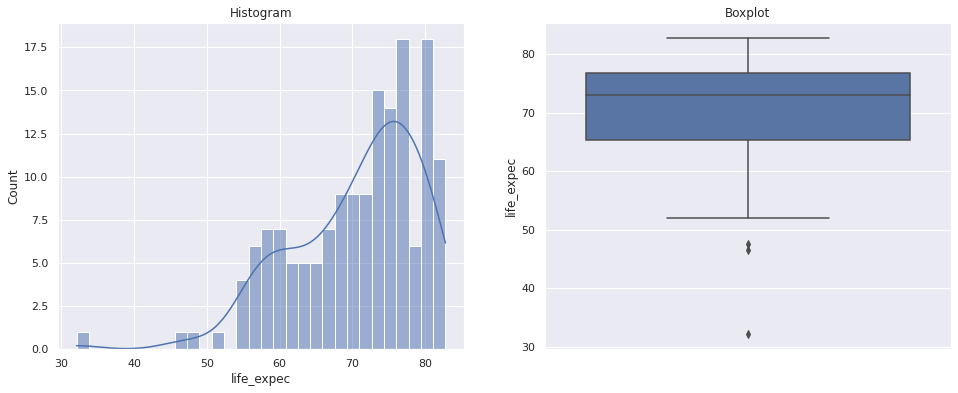

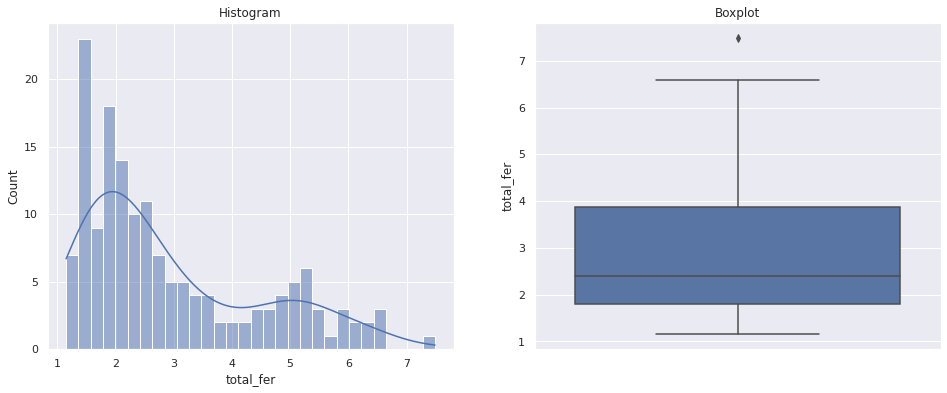

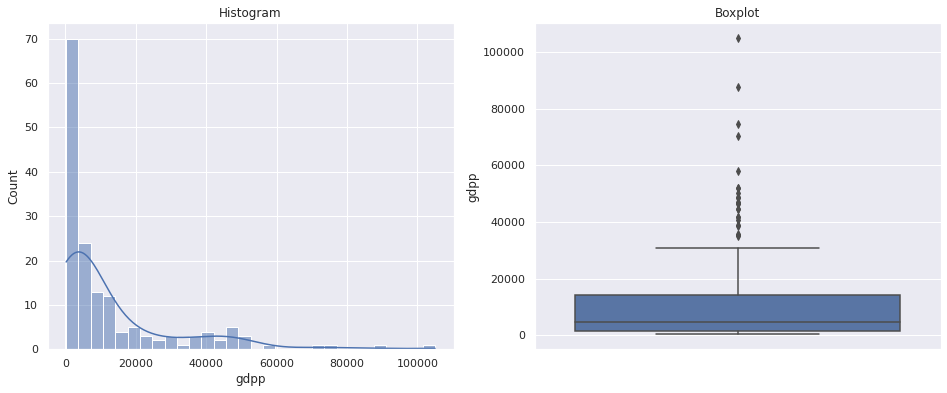

In [16]:
# plotting for numerical columns
for i in num_columns:
  outlier_plot(raw_data_2[i])

In [18]:
# Capping numerical columns
raw_data_4 = raw_data_2.copy()
for i in num_columns:
    capping_data(raw_data_2, i)

In [21]:
# Drop data
raw_data_4.drop('country', axis=1, inplace=True)

## V.IV Feature scaling

In [22]:
# Define scaler
scaler = MinMaxScaler()

# Scaled the data
scaler.fit(raw_data_4)
raw_data_4_Scaled = scaler.transform(raw_data_4)

In [23]:
# Summarized new data
raw_data_4_Scaled

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [24]:
# Define new raw_data_5 to new dataframe
raw_data_5 = pd.DataFrame(raw_data_4_Scaled, columns=raw_data_4.columns)

In [25]:
raw_data_5.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## V.V Checking for Multicollinearity 

In [26]:
# make new dataframe for VIF test
vif_data = pd.DataFrame()
vif_data["feature"] = raw_data_5.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(raw_data_5.values, i) for i in range(len(raw_data_5.columns))]

vif_data

,feature,VIF
0,child_mort,7.119601
1,exports,15.890441
2,health,7.209474
3,imports,16.830192
4,income,12.614277
5,inflation,2.860381
6,life_expec,12.044029
7,total_fer,8.782742
8,gdpp,9.883537


- There are only 1 feature that's not correlated with other feature (VIF values lower than 5)
- if we're going to reduce the dimension, at least it could be only be reduced to 8 dimensions

## V.VI Reducing dimension using PCA

In [27]:
# define pca with 95%
pca_scaled=PCA(n_components=0.95).fit(raw_data_5)
pca_scaled.explained_variance_ratio_

array([0.54685003, 0.13584228, 0.12116324, 0.09856903, 0.03881587,
       0.03088308])

From vif we're expected to reduce featurers to 8, but using pca we could reduce it to 6 features.

In [28]:
# scaled dataset with pca
data_scaled=pca_scaled.transform(raw_data_5)

In [29]:
# summarized new data
data_scaled

array([[-6.00800975e-01,  9.10192091e-02,  1.54802204e-01,
        -1.43078054e-02, -4.46973733e-02, -4.79843286e-02],
       [ 1.57826436e-01, -2.15360124e-01, -6.08476245e-02,
        -5.89281412e-02,  1.55802858e-02, -9.90700576e-03],
       [ 3.51016977e-03, -1.30382505e-01, -1.49185829e-01,
         1.24663428e-01, -9.06274305e-02,  2.47195233e-02],
       [-6.48133627e-01,  2.85830063e-01, -1.57304312e-01,
         1.30639459e-01, -8.08547577e-02,  2.87271627e-02],
       [ 2.01498764e-01, -6.69035987e-02, -9.45167603e-02,
        -4.30583353e-02, -3.39983546e-02, -5.63026280e-02],
       [ 1.08475918e-01, -2.08483029e-01,  1.05114154e-01,
         1.24139535e-01, -5.62771505e-02,  1.16395998e-01],
       [ 8.79373252e-02, -2.42714983e-01, -1.58214370e-01,
         6.83552023e-03,  5.24803853e-02, -8.18219722e-03],
       [ 4.35383167e-01,  1.09246052e-02,  2.55078769e-01,
         2.53439598e-01,  1.62045061e-02, -6.88134341e-02],
       [ 5.16889995e-01,  1.03239918e-01,  2.542

In [31]:
# compare resemblance new data to original dataframe
np.sum(pca_scaled.explained_variance_ratio_)

0.9721235353390657

# VI. Model Algorithm

In [32]:
# Make function comparios

def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

## VI.I Define Model

In [44]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

Text(0, 0.5, 'Inertia')

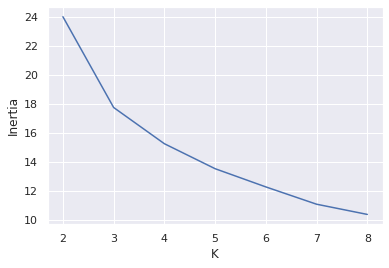

In [45]:
# Elbow test
K=[2,3,4,5,6,7,8]
inertia=[KMeans(n_clusters=i).fit(data_scaled).inertia_ for i in K]
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')

As we can see the elbow shaped on the third K, but for clearer information we do a silhouette test next.

For n_clusters = 2 The average silhouette_score is : 0.3871249611675936
For n_clusters = 3 The average silhouette_score is : 0.34848235969726804
For n_clusters = 4 The average silhouette_score is : 0.3594543971200005
For n_clusters = 5 The average silhouette_score is : 0.25651669270375405
For n_clusters = 6 The average silhouette_score is : 0.21980623386524906
For n_clusters = 7 The average silhouette_score is : 0.23991863301281513
For n_clusters = 8 The average silhouette_score is : 0.25592702202317125


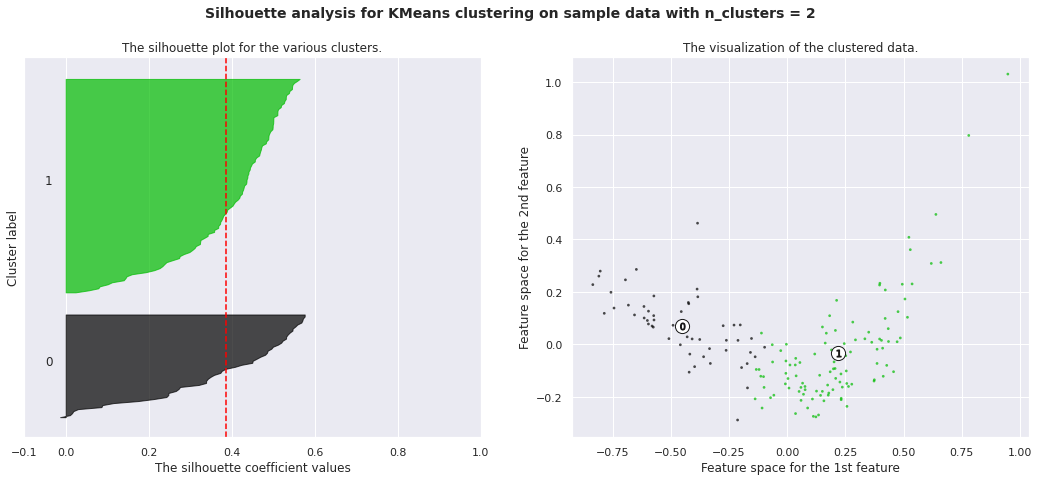

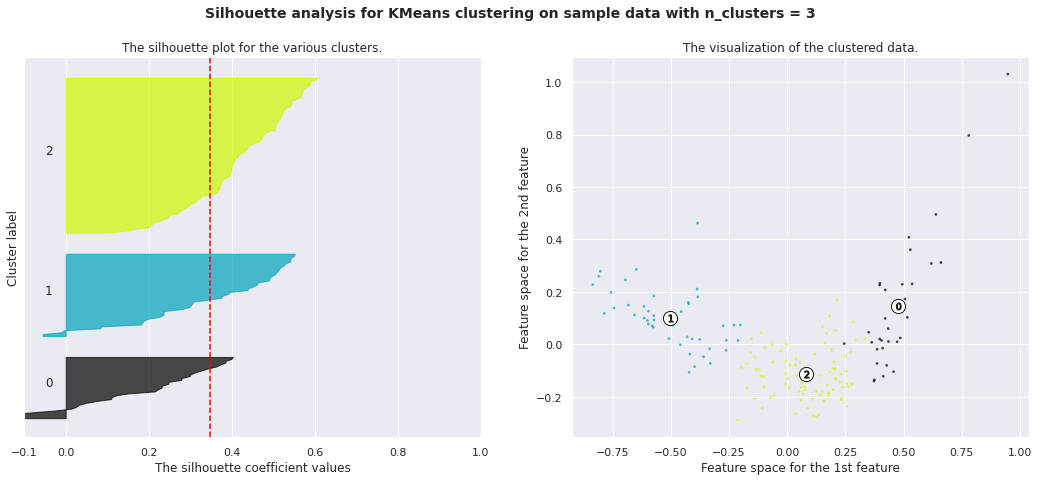

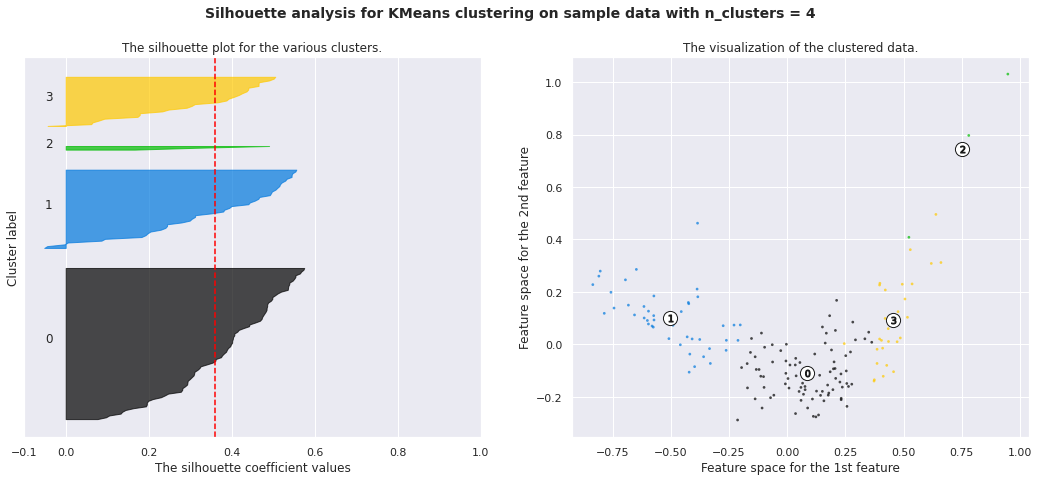

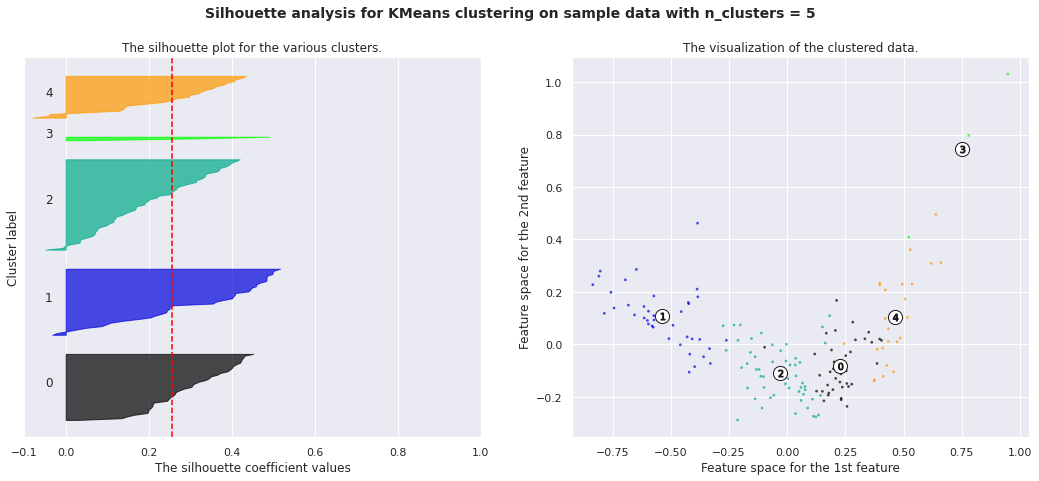

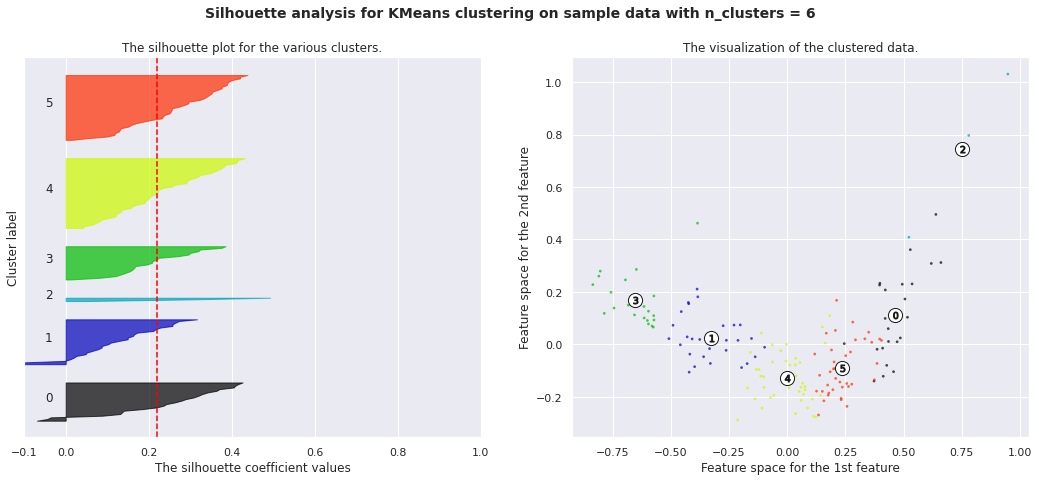

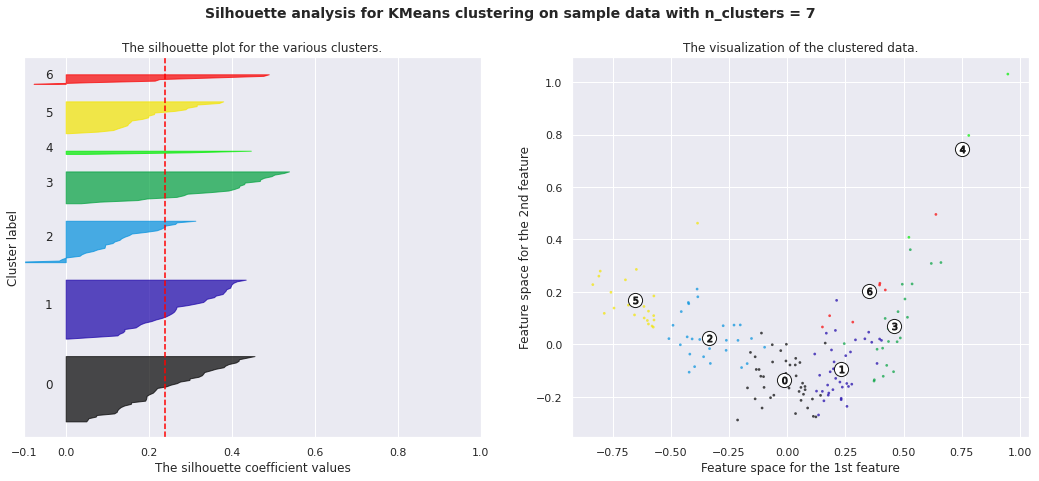

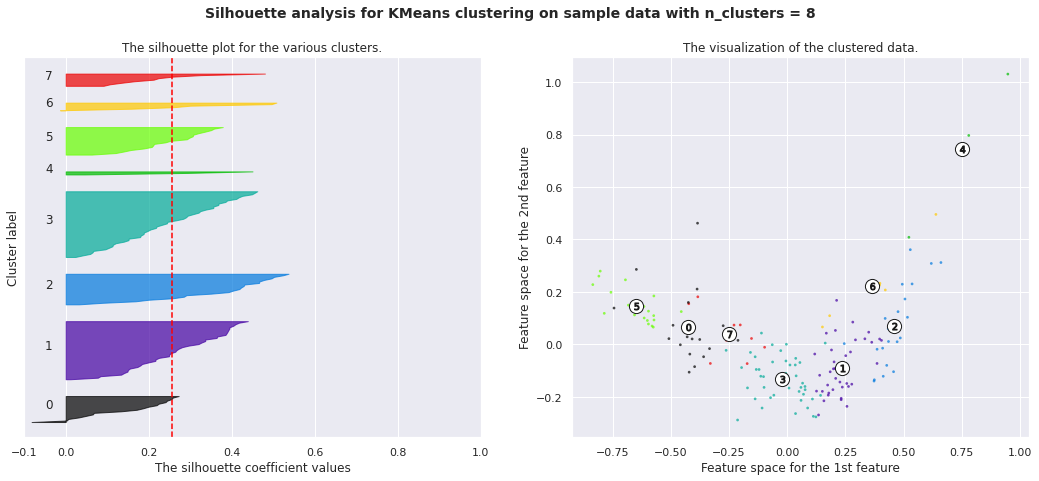

In [46]:
# Silhouette test
plot_silhouette(K,data_scaled)

k = 3 is the most fit cluster.

## VI.II Model Training

In [47]:
# Define model with fit K 
kmeans=KMeans(n_clusters=3)
kmeans.fit(data_scaled)

KMeans(n_clusters=3)

In [68]:
y_pred = kmeans.fit_predict(data_scaled)

In [79]:
y_pred

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 2,
       2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 0, 2, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 1,
       2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 0, 1, 2, 0,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 0, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 0], dtype=int32)

## VI.III Model evaluation

In [110]:
# Clustering Results
result_table = raw_data_2.copy()
result_table['group'] = y_pred
result_table

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [111]:
# Group  no: 1
result_table[result_table['group'] == 1].sample(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300,1
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400,1
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400,1


all of these countries are categorically developed nation.

In [112]:
# Group  no: 0
result_table[result_table['group'] == 0].sample(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,0
149,Timor-Leste,62.6,2.2,9.12,27.8,1850,26.50,71.1,6.23,3600,0
72,Iraq,36.9,39.4,8.41,34.1,12700,16.60,67.2,4.56,4500,0
56,Gambia,80.3,23.8,5.69,42.7,1660,4.30,65.5,5.71,562,0
63,Guinea,109.0,30.3,4.93,43.2,1190,16.10,58.0,5.34,648,0


all of these countries are categorically poor nation.

In [113]:
# Group  no: 2
result_table[result_table['group'] == 2].sample(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group
86,Lebanon,10.3,35.8,7.03,60.2,16300,0.238,79.8,1.61,8860,2
78,Jordan,21.1,48.3,8.04,69.0,9470,8.430,75.8,3.66,3680,2
156,Ukraine,11.7,47.1,7.72,51.1,7820,13.400,70.4,1.44,2970,2
95,Malaysia,7.9,86.9,4.39,71.0,21100,7.270,74.5,2.15,9070,2
130,Serbia,7.6,32.9,10.40,47.9,12700,5.880,74.7,1.40,5410,2


all of these countries are categorically emergin nation.

As we can see there are 3 different groups, the first group are the richest and developer country (group = 1), the second group are the poorest and undeveloped country (group = 0), and emerging country (not developed enough but not poor) (group = 2),

### VI.III.I make 2d pca Visualization (soal nomer 2 visualisasi 2d)

In [114]:
# define pca with 2 dimensions
pca_scaled_2d=PCA(n_components=2).fit(raw_data_5)
pca_scaled_2d.explained_variance_ratio_

array([0.54685003, 0.13584228])

In [115]:
# scaled dataset with pca
data_scaled_2d=pca_scaled.transform(raw_data_5)

For n_clusters = 3 The average silhouette_score is : 0.34848235969726804


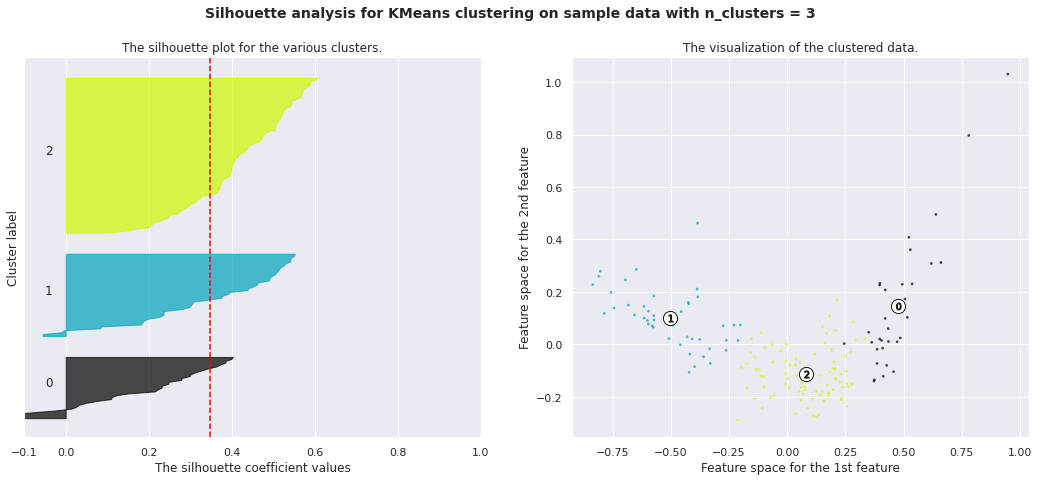

In [116]:
plot_silhouette([3],data_scaled_2d)

From the graphic above, we can confirm that there are 3 different group indeed

### VI.III.II EDA for clustering

In [144]:
result_table['group'].value_counts()

2    82
0    44
1    33
Name: group, dtype: int64

- 0 = Undeveloped countries
- 1 = Developed countries
- 2 = Emmerging countries

as we can see, that the world is dominated by emergin countries, followed by undeveloped countries. Obviously rich countries are only a handful.

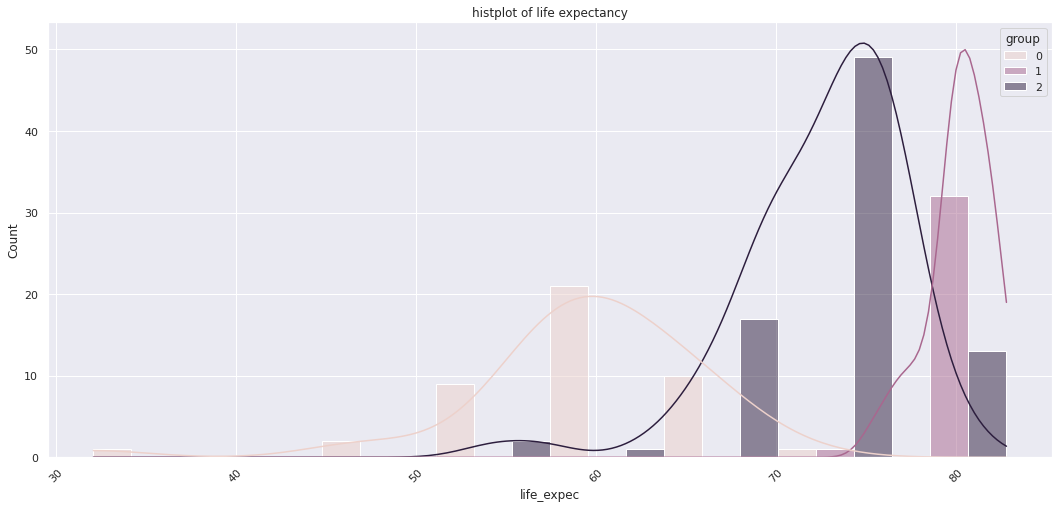

In [148]:
# Create plots

plt.figure(figsize=(18, 8))

# plt.subplot(1,2,1)
sns.histplot(x=result_table['life_expec'], hue=result_table['group'], multiple='dodge', kde=True, bins=8)
plt.xticks(rotation=45)
plt.title('histplot of life expectancy')

plt.show()


- 0 = Undeveloped countries
- 1 = Developed countries
- 2 = Emmerging countries

the life expectancy of rich countries are the highest, followed by emerging countries, and poor countries. Frome here we can conclude that, as nation developed, so does the life expectancy.

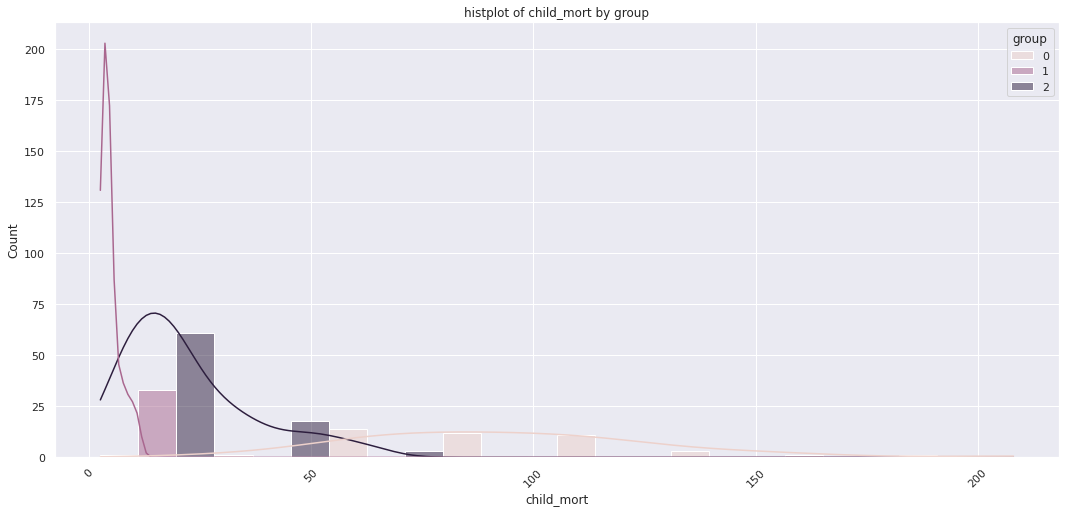

In [151]:
# Create plots

plt.figure(figsize=(18, 8))

# plt.subplot(1,2,1)
sns.histplot(x=result_table['child_mort'], hue=result_table['group'], multiple='dodge', kde=True, bins=8)
plt.xticks(rotation=45)
plt.title('histplot of child_mort by group')

plt.show()


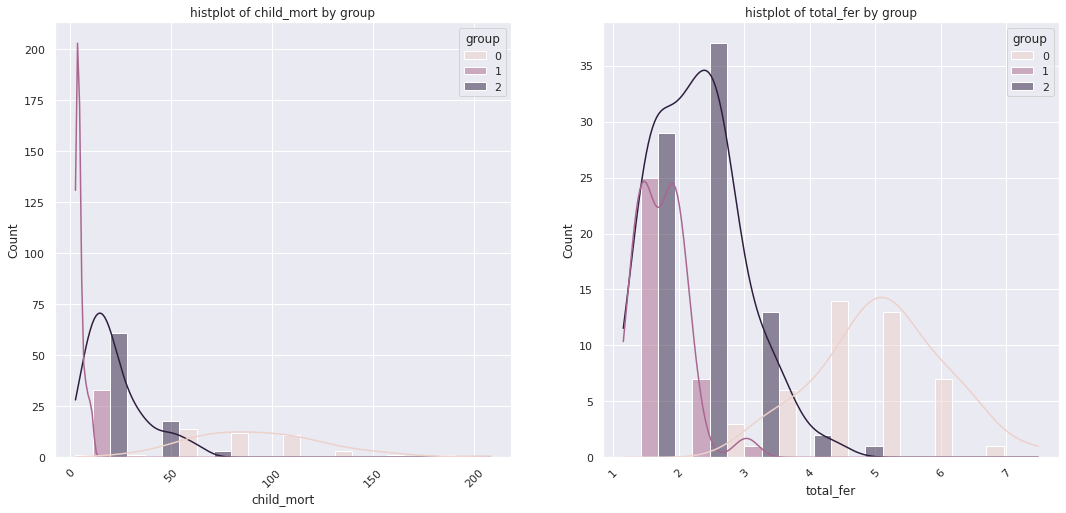

In [155]:
# Create plots

plt.figure(figsize=(18, 8))

plt.subplot(1,2,1)
sns.histplot(x=result_table['child_mort'], hue=result_table['group'], multiple='dodge', kde=True, bins=8)
plt.xticks(rotation=45)
plt.title('histplot of child_mort by group')

plt.subplot(1,2,2)
sns.histplot(x=result_table['total_fer'], hue=result_table['group'], multiple='dodge', kde=True, bins=8)
plt.xticks(rotation=45)
plt.title('histplot of total_fer by group')

plt.show()


- 0 = Undeveloped countries
- 1 = Developed countries
- 2 = Emmerging countries

the child mortality rate is so high on poor countries, followed by emmergin countries. while the fertililty rate of poor countries also the highest(perhaps caused by high mortality rate, it is prefered to have lots of children,, because there is a high chance one of the children will die)

# VIII. Save Model inference

In [117]:
# save model
with open('kmeans.pkl', 'wb') as file_1:
  joblib.dump(kmeans, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('pca.pkl', 'wb') as file_3:
  joblib.dump(pca_scaled, file_3)

with open('list_num.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

# IX. Model inference

In [118]:
# load All files

with open('kmeans.pkl', 'rb') as file_1:
  kmeans_s = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = joblib.load(file_2)

with open('pca.pkl', 'rb') as file_3:
  model_pca = joblib.load(file_3)

with open('list_num.txt', 'r') as file_4:
  list_num_cols = json.load(file_4)

#### Ineferencing

In [119]:
# display inference-set
data_inf

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
29,Canada,5.6,29.1,11.30,31.0,40700,2.87,81.3,1.63,47400
71,Iran,19.3,24.4,5.60,19.4,17400,15.90,74.5,1.76,6530
93,Madagascar,62.2,25.0,3.77,43.0,1390,8.79,60.8,4.60,413
27,Cambodia,44.4,54.1,5.68,59.5,2520,3.12,66.1,2.88,786
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
111,New Zealand,6.2,30.3,10.10,28.0,32300,3.73,80.9,2.17,33700
65,Guyana,37.6,51.4,5.38,79.1,5840,5.73,65.5,2.65,3040
153,Turkey,19.1,20.4,6.74,25.5,18000,7.01,78.2,2.15,10700


In [120]:
# define numerical columns
data_inf_num = data_inf[list_num_cols]

data_inf_num

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
29,5.6,29.1,11.30,31.0,40700,2.87,81.3,1.63,47400
71,19.3,24.4,5.60,19.4,17400,15.90,74.5,1.76,6530
93,62.2,25.0,3.77,43.0,1390,8.79,60.8,4.60,413
27,44.4,54.1,5.68,59.5,2520,3.12,66.1,2.88,786
94,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
111,6.2,30.3,10.10,28.0,32300,3.73,80.9,2.17,33700
65,37.6,51.4,5.38,79.1,5840,5.73,65.5,2.65,3040
153,19.1,20.4,6.74,25.5,18000,7.01,78.2,2.15,10700


In [121]:
# feature sfcaling and feature encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)

data_inf_num_scaled

array([[0.01460565, 0.14503404, 0.58980733, 0.17784954, 0.32229824,
        0.06542833, 0.9704142 , 0.07570978, 0.45021905],
       [0.08130477, 0.12152123, 0.23555003, 0.11115762, 0.13498565,
        0.18584234, 0.83629191, 0.09621451, 0.06012275],
       [0.29016553, 0.12452286, 0.12181479, 0.24684119, 0.00627859,
        0.12013677, 0.56607495, 0.54416404, 0.00173716],
       [0.20350536, 0.27010221, 0.24052206, 0.3417047 , 0.01536285,
        0.06773866, 0.67061144, 0.27287066, 0.00529737],
       [0.42794547, 0.11351687, 0.29707893, 0.20027183, 0.00338449,
        0.15072544, 0.41420118, 0.65615142, 0.00217622],
       [0.01752678, 0.15103732, 0.51522685, 0.16060163, 0.25476924,
        0.07337584, 0.96252465, 0.16088328, 0.31945518],
       [0.17039922, 0.25659484, 0.22187694, 0.45439106, 0.04205288,
        0.09185842, 0.65877712, 0.23659306, 0.02681137],
       [0.08033106, 0.10151032, 0.30640149, 0.14622837, 0.13980915,
        0.10368727, 0.90927022, 0.15772871, 0.0999246 ]])

In [122]:
# Feature scaled pca
data_pca = model_pca.transform(data_inf_num_scaled)

In [123]:
# predict cluster
y_pred_inf = kmeans_s.predict(data_pca)
y_pred_inf

array([1, 2, 0, 2, 0, 1, 2, 2], dtype=int32)

In [125]:
# Clustering Results for inference
result_table_inf = data_inf.copy()
result_table_inf['group'] = y_pred_inf
result_table_inf

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group
29,Canada,5.6,29.1,11.30,31.0,40700,2.87,81.3,1.63,47400,1
71,Iran,19.3,24.4,5.60,19.4,17400,15.90,74.5,1.76,6530,2
93,Madagascar,62.2,25.0,3.77,43.0,1390,8.79,60.8,4.60,413,0
27,Cambodia,44.4,54.1,5.68,59.5,2520,3.12,66.1,2.88,786,2
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459,0
111,New Zealand,6.2,30.3,10.10,28.0,32300,3.73,80.9,2.17,33700,1
65,Guyana,37.6,51.4,5.38,79.1,5840,5.73,65.5,2.65,3040,2
153,Turkey,19.1,20.4,6.74,25.5,18000,7.01,78.2,2.15,10700,2


### X. Conclusions

the world is dominated by emergin countries, followed by undeveloped countries. Obviously rich countries are only a handful. the life expectancy of rich countries are the highest, followed by emerging countries, and poor countries. Frome here we can conclude that, as nation developed, so does the life expectancy.the child mortality rate is so high on poor countries, followed by emmergin countries. while the fertililty rate of poor countries also the highest(perhaps caused by high mortality rate, it is prefered to have lots of children,, because there is a high chance one of the children will die)

WE suggest that we help the poor countries group(0) first, since they have a high mortality rate for children.